In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np
import os 

In [2]:
df= pd.read_csv(r'data\ohlc.csv')
df= df[['Datetime', 'Open', 'Close', 'High', 'Low', 'Volume']]
df = df.set_index('Datetime')
df.to_csv('msft.csv')
df = pd.read_csv('msft.csv')
os.remove('msft.csv')
df['Datetime']= pd.to_datetime(df['Datetime'])
df

,Datetime,Open,Close,High,Low,Volume
0,2021-05-25 09:15:00,213.05,212.60,213.35,212.60,1502142
1,2021-05-25 09:20:00,212.75,212.40,212.85,212.15,1995829
2,2021-05-25 09:25:00,212.40,212.75,213.00,212.40,655651
3,2021-05-25 09:30:00,212.85,212.80,213.00,212.50,653488
4,2021-05-25 09:35:00,212.90,212.45,213.00,212.45,492671
...,...,...,...,...,...,...
1285,2021-06-16 15:10:00,208.25,207.90,208.30,207.90,623171
1286,2021-06-16 15:15:00,207.95,207.80,208.20,207.80,872701
1287,2021-06-16 15:20:00,207.90,207.70,207.90,207.65,651114
1288,2021-06-16 15:25:00,207.75,207.40,207.85,207.40,1144346


In [3]:
def sma(data, n):
            sma = data.rolling(window = n).mean()
            return pd.DataFrame(sma)

n = [20, 50]
for i in n:
    df[f'sma_{i}'] = sma(df['Close'], i)
df['sma_20'].fillna(0, inplace=True)
df['sma_50'].fillna(0, inplace=True)
df['sma_20'].apply(lambda a:"{0:.10f}".format(a))
df['sma_50'].apply(lambda a:"{0:.10f}".format(a))
df['sma_20']

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
1285    208.4200
1286    208.3750
1287    208.3275
1288    208.2675
1289    208.1950
Name: sma_20, Length: 1290, dtype: float64

## Strategy

In [4]:
sma1 = df['sma_20']
sma2= df['sma_50']
buy_price = []
sell_price = []
sma_signal = []
signal = 0

In [5]:
for s, t in zip(sma1, sma2): 
    print(s, t)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
212.58499999999998 0.0
212.55 0.0
212.53249999999997 0.0
212.51500000000001 0.0
212.4825 0.0
212.48499999999999 0.0
212.4725 0.0
212.4625 0.0
212.44500000000002 0.0
212.4125 0.0
212.375 0.0
212.3225 0.0
212.26500000000001 0.0
212.21750000000003 0.0
212.17 0.0
212.1525 0.0
212.1525 0.0
212.15 0.0
212.14749999999998 0.0
212.15499999999997 0.0
212.15750000000003 0.0
212.15500000000003 0.0
212.1375 0.0
212.1075 0.0
212.0875 0.0
212.04500000000002 0.0
212.01500000000001 0.0
211.9825 0.0
211.95999999999998 0.0
211.93249999999998 0.0
211.89749999999998 212.229
211.84 212.194
211.79250000000002 212.166
211.73000000000002 212.12900000000002
211.67999999999998 212.095
211.615 212.06599999999997
211.5375 212.03099999999998
211.4725 212.002
211.42249999999999 211.975
211.38000000000002 211.947
211.3225 211.90599999999998
211.26749999999998 211.86
2

In [6]:
for row,s, t in zip(df.iterrows(), sma1, sma2):
    print(s, t)
    if s > t:
        if signal != 1:
            buy_price.append(row)
            sell_price.append(np.nan)
            signal = 1
            sma_signal.append(signal)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            sma_signal.append(0)
    elif t > s:
        if signal != -1:
            buy_price.append(np.nan)
            sell_price.append(row)
            signal = -1
            sma_signal.append(-1)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            sma_signal.append(0)
    else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        sma_signal.append(0)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
212.58499999999998 0.0
212.55 0.0
212.53249999999997 0.0
212.51500000000001 0.0
212.4825 0.0
212.48499999999999 0.0
212.4725 0.0
212.4625 0.0
212.44500000000002 0.0
212.4125 0.0
212.375 0.0
212.3225 0.0
212.26500000000001 0.0
212.21750000000003 0.0
212.17 0.0
212.1525 0.0
212.1525 0.0
212.15 0.0
212.14749999999998 0.0
212.15499999999997 0.0
212.15750000000003 0.0
212.15500000000003 0.0
212.1375 0.0
212.1075 0.0
212.0875 0.0
212.04500000000002 0.0
212.01500000000001 0.0
211.9825 0.0
211.95999999999998 0.0
211.93249999999998 0.0
211.89749999999998 212.229
211.84 212.194
211.79250000000002 212.166
211.73000000000002 212.12900000000002
211.67999999999998 212.095
211.615 212.06599999999997
211.5375 212.03099999999998
211.4725 212.002
211.42249999999999 211.975
211.38000000000002 211.947
211.3225 211.90599999999998
211.26749999999998 211.86
2

In [9]:
df

,Datetime,Open,Close,High,Low,Volume,sma_20,sma_50
0,2021-05-25 09:15:00,213.05,212.60,213.35,212.60,1502142,0.0000,0.000
1,2021-05-25 09:20:00,212.75,212.40,212.85,212.15,1995829,0.0000,0.000
2,2021-05-25 09:25:00,212.40,212.75,213.00,212.40,655651,0.0000,0.000
3,2021-05-25 09:30:00,212.85,212.80,213.00,212.50,653488,0.0000,0.000
4,2021-05-25 09:35:00,212.90,212.45,213.00,212.45,492671,0.0000,0.000
...,...,...,...,...,...,...,...,...
1285,2021-06-16 15:10:00,208.25,207.90,208.30,207.90,623171,208.4200,208.227
1286,2021-06-16 15:15:00,207.95,207.80,208.20,207.80,872701,208.3750,208.229
1287,2021-06-16 15:20:00,207.90,207.70,207.90,207.65,651114,208.3275,208.227
1288,2021-06-16 15:25:00,207.75,207.40,207.85,207.40,1144346,208.2675,208.221


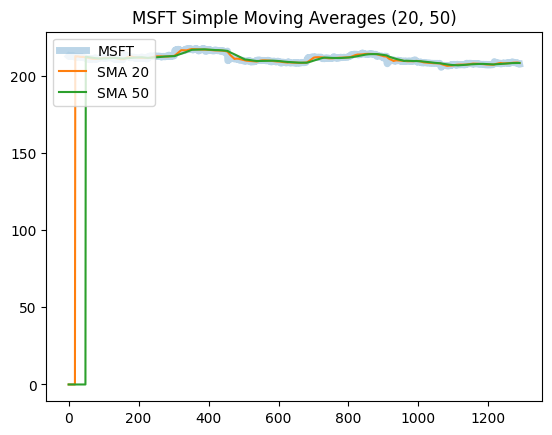

In [14]:
plt.plot(df['Close'], label = 'MSFT', linewidth = 5, alpha = 0.3)
plt.plot(df['sma_20'], label = 'SMA 20')
plt.plot(df['sma_50'], label = 'SMA 50')
plt.title('MSFT Simple Moving Averages (20, 50)')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
msft

,Open,Close,High,Low,Volume,sma_20,sma_50
Datetime,,,,,,,
2021-05-25 09:15:00,213.05,212.60,213.35,212.60,1502142,0.0000,0.000
2021-05-25 09:20:00,212.75,212.40,212.85,212.15,1995829,0.0000,0.000
2021-05-25 09:25:00,212.40,212.75,213.00,212.40,655651,0.0000,0.000
2021-05-25 09:30:00,212.85,212.80,213.00,212.50,653488,0.0000,0.000
2021-05-25 09:35:00,212.90,212.45,213.00,212.45,492671,0.0000,0.000
...,...,...,...,...,...,...,...
2021-06-16 15:10:00,208.25,207.90,208.30,207.90,623171,208.4200,208.227
2021-06-16 15:15:00,207.95,207.80,208.20,207.80,872701,208.3750,208.229
2021-06-16 15:20:00,207.90,207.70,207.90,207.65,651114,208.3275,208.227


c:\Users\kirti\Automated Trading_simulation\venv\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: setting an array element with a sequence.

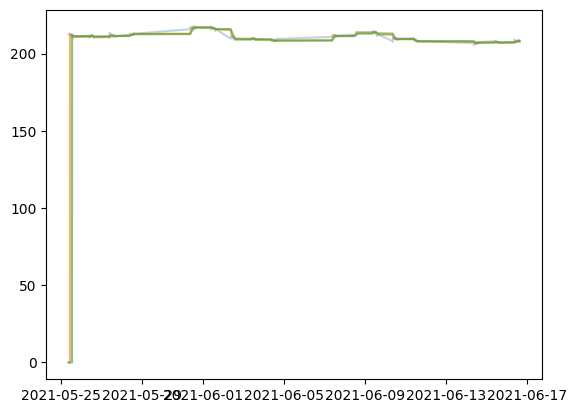

In [18]:
msft= df.copy() 
msft.set_index('Datetime', inplace=True)
plt.plot(msft['Close'], alpha = 0.3, label = 'MSFT')
plt.plot(msft['sma_20'], alpha = 0.6, label = 'SMA 20')
plt.plot(msft['sma_50'] , alpha = 0.6, label = 'SMA 50')
plt.scatter(msft.index, buy_price, marker = '^', s = 200, color = 'darkblue', label = 'BUY SIGNAL')
plt.scatter(msft.index, sell_price , marker = 'v', s = 200, color = 'crimson', label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('MSFT SMA CROSSOVER TRADING SIGNALS')
plt.savefig("{% static 'plot.png' %}")
plt.show()

In [12]:
msft.index

RangeIndex(start=0, stop=1290, step=1)